In [2]:
# Imports

import numpy as np
import matplotlib.pyplot as plt

# Task 1

Check consistency of results with Stokes law. The mass of the silica particles is $m = \rho \frac{4\pi (D/2)^3}{3} \approx 3.013*10^{-11}$ g.

# Task 2

Chose our units to be $L=1 \mu m$, $T = 1 \mu s $, $M=1g$. This gives energy the dimensions 

$$E = ML^2/T^2 = 10^{-3} kg \cdot \frac{(10^{-6}m)^2}{(10^{-6}s)^2} = 10^{-3} J \rightarrow 1 J = 10^{3} E_{unit}$$

We thus have the values of parameters:

$$ \tau = 48.5 \rm T, 147.3 \rm T$$
$$ x(0) = 0.1 \rm L $$
$$ v(0) = 2.0 \rm \mu m/ms = 2.0\cdot 10^{-3} \rm L/T $$
$$ f_0 = 3 kHz = 3000 \cdot 1/s = 3000 \cdot 1/(10^6 T) = 3\cdot 10^{-3} \rm 1/T  $$
$$ Temp = 297 K$$
$$ k_B = 1.381 \cdot 10^{-23} J/T \hspace{15px} 1.381 \cdot 10^{-23} \cdot 10^{3} E/T = 1.381 \cdot 10^{-20} E/Temp $$

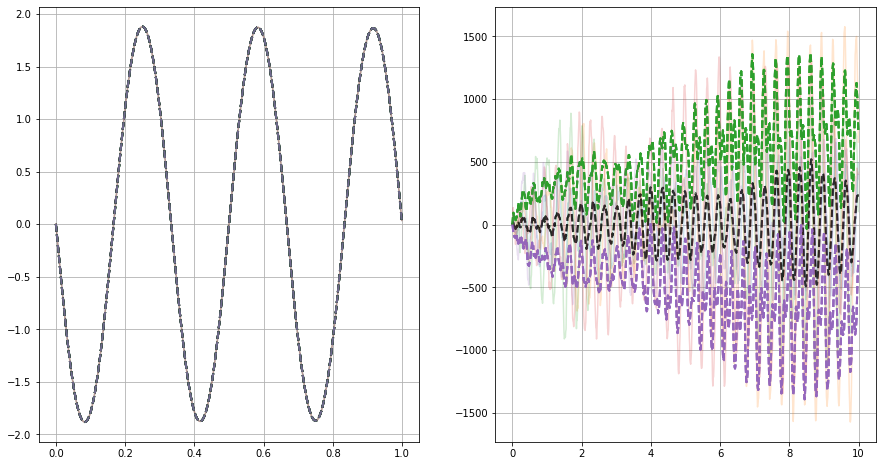

In [65]:
# Load data
pos = np.loadtxt("pos.dat")
vel = np.loadtxt("vel.dat")

fig, ax = plt.subplots(1,2,figsize=(15,8))

meanPos = np.mean(pos[:,1:], axis=1)
meanVel = np.mean(vel[:,1:], axis=1)
varPos = np.var(pos[:,1:], axis=1)
varVel = np.var(vel[:,1:], axis=1)

nwalkers = len(pos[0,1:])

for i in range(1,nwalkers+1):
    ax[0].plot(pos[:,0], pos[:,i], alpha=0.2)
    ax[0].plot(pos[:,0], meanPos, color='k', linestyle='--', linewidth=2, alpha=1)
    ax[0].plot(pos[:,0], meanPos+np.sqrt(varPos), color='C2', linestyle='--', linewidth=2, alpha=0.7)
    ax[0].plot(pos[:,0], meanPos-np.sqrt(varPos), color='C4', linestyle='--', linewidth=2, alpha=0.7)
    ax[0].grid()
    
    
    ax[1].plot(vel[:,0], vel[:,i], alpha=0.2)
    ax[1].plot(vel[:,0], meanVel, color='k', linestyle='--', linewidth=2, alpha=0.3)
    ax[1].plot(vel[:,0], meanVel+np.sqrt(varVel), color='C2', linestyle='--', linewidth=2, alpha=0.7)
    ax[1].plot(vel[:,0], meanVel-np.sqrt(varVel), color='C4', linestyle='--', linewidth=2, alpha=0.7)
    ax[1].grid()


# Task 3 - Generate a lot of trajectories, and plot histograms over vel for a few times

In [68]:
vel = np.loadtxt("vel_many.dat")

[[ 0.0000000e+00  2.0000000e-03  2.0000000e-03 ...  2.0000000e-03
   2.0000000e-03  2.0000000e-03]
 [ 1.0000000e-02 -3.5014093e-01 -3.5015263e-01 ... -3.5014920e-01
  -3.5014463e-01 -3.5015274e-01]
 [ 2.0000000e-02 -6.8976897e-01 -6.8978482e-01 ... -6.8979973e-01
  -6.8978270e-01 -6.8979323e-01]
 ...
 [ 9.9700000e+00  4.7966933e-01  4.7990976e-01 ...  4.7977453e-01
   4.7986194e-01  4.7975667e-01]
 [ 9.9800000e+00  1.6638415e-01  1.6660727e-01 ...  1.6644829e-01
   1.6655036e-01  1.6650875e-01]
 [ 9.9900000e+00 -1.5273097e-01 -1.5255725e-01 ... -1.5271252e-01
  -1.5261127e-01 -1.5259668e-01]]


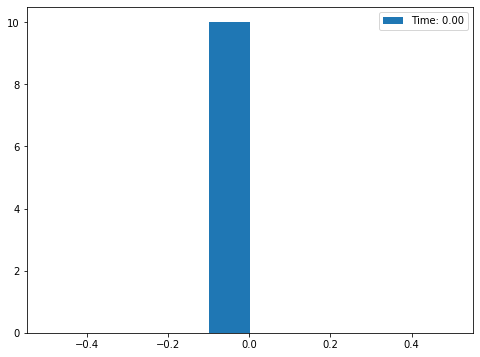

In [71]:
# Plot histogram for 5 times: 1/5, 2/5, 3/5 etc
n_plots = 5
dT = np.int(vel.shape[0]/n_plots)
print(vel)

fig, ax = plt.subplots(figsize=(8,6))
for i in range(1):
    ax.hist(vel[dT*i, 1:], label=f'Time: {i*dT/vel.shape[0]:.2f}')

ax.legend(loc='best')